In [2]:
! pip install xgboost

                                              0.0/150.0 MB ? eta -:--:--
                                              0.1/150.0 MB 3.3 MB/s eta 0:00:46
                                              0.3/150.0 MB 2.8 MB/s eta 0:00:53
                                              0.5/150.0 MB 3.5 MB/s eta 0:00:43
                                              0.7/150.0 MB 3.6 MB/s eta 0:00:42
                                              0.8/150.0 MB 3.4 MB/s eta 0:00:45
                                              0.9/150.0 MB 3.7 MB/s eta 0:00:40
                                              1.2/150.0 MB 3.7 MB/s eta 0:00:41
                                              1.4/150.0 MB 3.7 MB/s eta 0:00:41
                                              1.6/150.0 MB 3.7 MB/s eta 0:00:40
                                              1.8/150.0 MB 3.9 MB/s eta 0:00:39
                                              2.1/150.0 MB 4.0 MB/s eta 0:00:37
                                              2


[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier

In [15]:
# Load the dataset
data = pd.read_csv("bill_authentication.csv")
X = data.drop(columns=["Class"]).values  
y = data["Class"].values  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
#Bagging (Bootstrap Aggregating)
# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9927272727272727


In [18]:
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       147
           1       1.00      0.98      0.99       128

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



Confusion Matrix:
 [[147   0]
 [  2 126]]


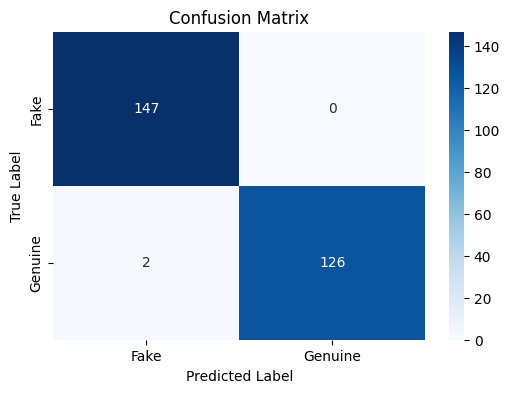

In [17]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Raw print
print("Confusion Matrix:\n", cm)

# Heatmap visualization
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Fake", "Genuine"], yticklabels=["Fake", "Genuine"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [19]:
#Boosting
# Train XGBoost model
model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Boosting (XGBoost) Accuracy:", accuracy_score(y_test, y_pred))

Boosting (XGBoost) Accuracy: 0.9963636363636363


In [20]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       147
           1       1.00      0.99      1.00       128

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



Confusion Matrix:
 [[147   0]
 [  1 127]]


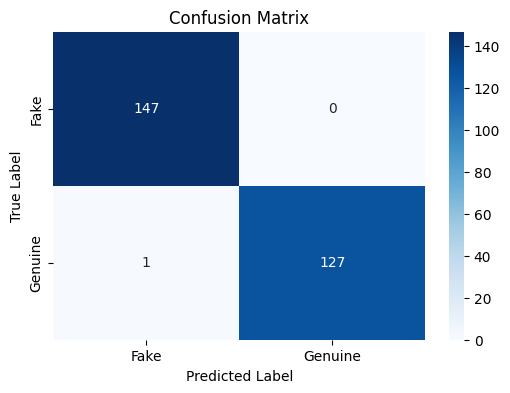

In [21]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Raw print
print("Confusion Matrix:\n", cm)

# Heatmap visualization
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Fake", "Genuine"], yticklabels=["Fake", "Genuine"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [22]:
#Stacking (Stacked Generalization)
# Define base models
base_models = [
    ('knn', KNeighborsClassifier(n_neighbors=3)),
    ('dt', DecisionTreeClassifier(max_depth=3))
]

# Define meta-model
meta_model = SVC(kernel='linear', probability=True)

# Train Stacking Classifier
model = StackingClassifier(estimators=base_models, final_estimator=meta_model)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))



Accuracy: 0.9963636363636363


In [23]:
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       147
           1       1.00      0.99      1.00       128

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



Confusion Matrix:
 [[147   0]
 [  1 127]]


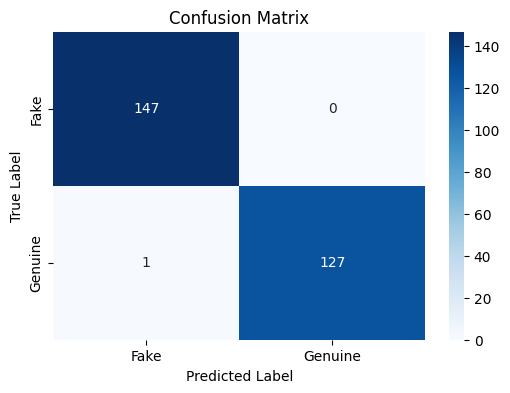

In [24]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Raw print
print("Confusion Matrix:\n", cm)

# Heatmap visualization
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Fake", "Genuine"], yticklabels=["Fake", "Genuine"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
